# Determinantal Point Processes (DPP) for physicist

This is a brief introduction to DPP. We are interested in practical application and therefore we focus on the so-called $L_{ensamble}$. 

The main idea is that DPP are an elegant way to include repulsion between elements. The only thing you need is to specify the **similarity symmetric matrix $L$** where $L$ is positive semidefinite, i.e. **all its eigenvalues are non-negative**.
1. The similarity matrix $L$ has size $N \times N$. For example, if there are $N$ locations on a line the matrix $L$ gives the similarity between any to pair of locations. To achieve particle repulsion we assume that $L_{i,i}=1$ and $L_{i,j}$ decays with the cartesian distance between locations $i$ and $j$. A common choice is to use a gaussian kernel: $L_{i,j}=\exp[-\gamma d(i,j)^2]$. This matrix is positive semi-definite. Another common choice is $L_{i,j}=v_i \cdot v_j$ where $v_i, v_j$ are the vectors corresponding to elements $i,j$ respectively.
2. The fundamental property of DPP is that the probability of selecting any subset $Y$ of particles is $P(Y)\propto det(L_Y)$ where $L_Y$ is the similarity matrix restricted to the rows and columns corresponding to the few particles selected. Neglecting the normalizing constant for a second we see that the probability of selecting just one particle at location $i$ is $P(i) = L_{i,i}$ and the probability of selecting only two particles at locations $i,j$ is $P(i,j) = L_{i,i}L_{j,j}-L_{i,j}L_{j,i} = P(i)P(j) - L_{i,j}^2 \le P(i)P(j)$, i.e. the particle repeal each other. 
4. The normalization constant is $\sum_Y det(L_Y) = det(L+I)$. For example if there are only two locations then there are only 4 possibility: zero particle, one particle at 1, one particle at 2, two particles at 1 and 2. Then we have
\begin{equation}
\sum_Y det(L_Y)= 1 + L_{1,1} + L_{2,2} + \left(L_{1,1}L_{2,2} - L_{1,2}L_{2,1}\right) = (L_{1,1}+1)(L_{2,2}+1)- L_{1,2}L_{2,1} = det(L+I).
\end{equation}
Note that we have adopted the convention that the determinant of the empy matrix is $1$, i.e. $det(L_{Y=\text{empty}})=1$. 

Note that DPP are probability distribution over all possible subsets of $N$ elements. Obviously the number of such subsets scales exponentially in $N$ but, amazingly, the normalization constant can be computed in $\mathcal{O}(N^3)$ operations (any determinant can be computed by LU-factorization). 

## Sampling from DPP intuition

A very nice property of DPP is that an efficient sampling algorithm exists. 

We can use physics to provide the intuition. Suppose that you consider a system of **non-interacting fermions** with Hamiltonian $H=-L$. In this scenario $-L_{i,i}$ describes the external potential at site $i$ and $-L_{i,j}$ describes the hopping between site $i$ and $j$. Now you diagonalize $H$ to obtain its eigenvalues and eigenvectors $\lambda_i,v_i$. 
In physics any configuration (i.e. wave-function) of $n$ **non-interacting fermions** can be obtained by filling $n$ single-particle eigenstates and by **anti-symmetrize**. The total energy of the configuration is $E=\sum \lambda_i$ and the probability of that configuration is $p\propto exp[-\beta E] = exp[-\beta \sum_i \lambda_i ] = \prod_i f(\lambda_i)$ where $f(\lambda)\equiv \exp[-\beta \lambda]$. 

The idea is the same for DPP with the difference that the function $f(\lambda)$ is not an exponentail but it is linear, i.e. $f(\lambda)\equiv\lambda$. This is necessary since in the DPP the probability is proportional to the determinant which is just the product of the eigenvalues. 

So if we want to sample the location of particles according to a DPP process we should:
1. select a subset of $n$ eigenstate with probability $p\propto \prod \lambda_i $ 
2. sample the location of the particles according to that anti-symmetrized wave-function.
In the math literature, this approach is based on the fact that **DPPs are Mixtures of Elementary DPPs**. In step (1) we select the mixture (of eigenstate) and in step (2) we sample from that mixture without worrying about the values of the selected eigenvalues.

For example, let us say, that you selected the eigenstates $v_1,v_5,v_7$ with probability $p\propto \lambda_1 \times \lambda_5 \times \lambda_7$. Now you have to sample the location x,y,z of these three particles correspong to the wave-function 
\begin{equation}
\psi(x,y,z)= \frac{1}{\sqrt 3} det \begin{bmatrix}v_1(x) & v_1(y) & v_1(z) \\v_5(x) & v_5(y) & v_5(z) \\ v_7(x) & v_7(y) & v_7(z) \end{bmatrix}
\end{equation}

Step (1) is trivial. Step (2) on the other hand is still difficult because we do NOT want to work with the full wave-function. If there are 100 locations on the line to choose from the three-particles wave-function above has $100^3=10^6$ distinct values. The brute force approach would be to use the three selected eigenstates to compute the $10^6$ entries for the matrix $M_{i,j,k}$ and then select one entry proportionally to its value. The selected entry would specify, at once, the locations of the three particles. **This, all at one approach, scales badly with the number $n$ of particles** (the total wave-function has $N^n$ values). We would much rather **sample one particle at the time and then update the wave-function to take into account the previous choices**.

## Sampling from Elementary DPP

Let us assume that we have spectrally decomposed $L$ into $L=V D V^T$ where $D=\text{diag}(\lambda_1,\lambda_2,...,\lambda_L)$ and $V$ **contains as columns the eigenvectors of $L$**, i.e. $L V_\alpha = \lambda_\alpha V_\alpha$. Note that $L,V$ are $N \times N$ and the determinant of $det(L)=\prod_i^N \lambda_i$. 

In step (1) (see above) you have selected a particular set of eigenvectors $V_J = \{v_n : n \in J\}$. Now you have to sample from the elementary DPP with similarity matrix $L_J = V_J V_J^T$ where $V_J$ is a matrix of size $|J|\times N$, i.e. $V_J$ is tall matrix and $V_J^T$ is wide matrix:

\begin{equation}
L_{J} = V_J V_J^T = \sum_{n \in J} v_n v_n^T
\end{equation}
Note that $L_{J}$ is a $N \times N$ **square similarity matrix which defines a valid DPP**.

As we have argued at the beginning the fundamental property of the DPP is that $P(i)=det(L_{i,i})=L_{i,i}$. From the spectal decomposition of $L_J$ we see that we can choose the location of the first particle $i$ with probability:

\begin{equation}
P(i)=(L_{J})_{i,i} = e_i^T L_{J} e_i = \sum_{n \in J} (v_n\cdot e_i)^2 =\sum_{n \in J} v_n(i)^2
\end{equation}
where $e_i$ is the column vector with all-zeros except one 1 at the location $i$. 
Now we have to condition the DPP given the fact that we have chosen location $i$ for the first particle. Lukily DPP are closed under conditioning, i.e. after conditioning you get a new DPP. 




Note that 


$ So we can choose the first particle location by according to $L_{J}so we can choose a location $i . 




The matrix $L_Y$ for $Y=(1,2,7,8)$ can be obtained by **dotting** $L$ with a column and row vector which has all zero entry except ones at location 1,2,7,8. The determinant  












probability of each subset of eigenstates is If you want a configuration with $n$ particles you can select $n$ eigenvalues 


to fit 3 particles you select 3 eigenvalues and se

Then all configuration of particles can be thought as the possibility of fitting the particles into the eigenstaate.



4. More generally the probability of selecting any subset $\{i_1,i_2,...,i_N\}$ is $det(K_N)$ where $K_N$ is the square NxN matrix obtained by selecting the N rows and columns corresponding to the desired locations.

Here is the algorithm to sample a DPP

<img src="./diagram/sample_DPP.png">

In [3]:
import numpy as np
from sklearn.metrics.pairwise import rbf_kernel
import matplotlib.pylab as plt
%matplotlib inline

class dpp():
    def __init__(self):
        self.lenght = None 
        self.D  = None 
        self.V  = None
    
    def sample(self,k=None,verbose=False) -> list:
        """
        Sample the DPP and returns the locations of the DPP particles.
        If k is provided exactly k locations are returned
        """
            
        # PHASE 1: select the eigenvectors
        if(k==None):
            # Select each eigenvectors with probability lambda/(1+lambda)
            prob = np.divide(self.D,1+self.D)
            x = np.random.rand(prob.size)
            v = np.argwhere(x<prob)
            k = len(v)    
            V = self.V[:, v]
            V = V.reshape(self.lenght,-1)
        elif(k==self.length):
            #select all the eigenvectors
            k=self.lenght
            V=self.V
        elif(k>self.lenght):
            # error: Cannot sample more than self.lenght DPP particles
            print("Error: k>self.lenght")
            sys.exit()
        else:
            # select exactly k eigenvectors
            print("Error: Not implemented yet")
            sys.exit()
        
        if(verbose):
            print("I will select "+str(k)+" points:")
            
            
        # PHASE 2: Select iteratively a location
        #ground_set, rem_set = np.arange(N), np.full(N, True)
        locations = list(np.arange(0,self.lenght))
        chosen=[]
    
        for n in range(0,k):
            # compute probabilities for each item
            prob=np.linalg.norm(V,ord=None,axis=1)**2/(k-n) #this is probability of choosing each location
            prob=prob.flatten()
            #print("prob",prob)
            
            # select one location from the available_one 
            loc = np.random.choice(locations,size=1, p=prob.flatten()).item()
            chosen.append(loc)
            #print("add location",loc)
            
            if(len(chosen)==k):
                if(verbose):
                    print("chosen points:",chosen)
                return chosen
            else:
                # project the eigenvectors of the subspace perperndicular to the chosen location
                V[loc,:] = 0 # there is zero probability of choosing the same location twice
                j = np.random.choice(range(k-n),size=1,p=None)
                V = np.delete(V, j, axis=1)
            
                # Now I have to find a orthonormal basis in this subspace.
                # Basically I have to do Gram–Schmidt procedure
                basis = []
                for l in range(k-n-1):
                    v=V[:,l]
                    w = v - np.sum( np.dot(v,b)*b  for b in basis )
                    basis.append(w/np.linalg.norm(w))
                V=np.array(basis).T
                #print("V.shape after norm",V.shape)
        
        
class dpp_line(dpp):
    def __init__(self, lenght=10, gamma=0.2):
        super().__init__()
        self.lenght = lenght
        data = np.zeros([lenght,1])
        data[:,0]=np.arange(0,lenght)
        M = rbf_kernel(data,data,gamma)
        self.D, self.V  = np.linalg.eig(M)
        
    def sample(self,k=None,verbose=False):
        chosen = super().sample(k)
        return chosen

class dpp_plane(dpp):
    def __init__(self, lx=10, ly=10, gamma=0.2):
        super().__init__()
        
        data = np.zeros((lx,ly,2))
        for ix in range(lx):
            data[ix,:,0]=ix
        for iy in range(ly):
            data[:,iy,1]=iy
        data=data.reshape(-1,2)
        self.data=data
        M= rbf_kernel(data,data,gamma=0.2)
        self.lenght = lx*ly
        self.D, self.V  = np.linalg.eig(M)

        
    def sample(self,k=None,verbose=False):
        chosen_list = super().sample(k)
        xy_pair=np.array(self.data[chosen_list])
        return xy_pair
        
    


(18, 2)


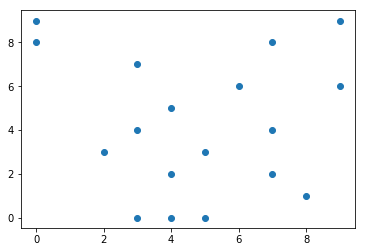

In [4]:
dpp=dpp_plane(10,10,0.1)
xy=dpp.sample(verbose=True)
print(xy.shape)
plt.scatter(xy[:,0],xy[:,1])


In [ ]:
        """
        This step differs from matlab code in the following way:
            
        1.  Create vector with valid indices which can be sampled
        2.  Normalise the probabilities
        3.  Make use of `np.random.choice` to choose (guarentees that it will be a new choice for `Y`)
        """        
        P_index = [(indx, prob) for indx, prob in list(zip(range(len(P)), P)) if indx not in Y]
        P_list = [x for x, _ in P_index]
        P_norm = np.array([p for _, p in P_index])
        P_norm = P_norm/np.sum(P_norm)
        choose_item = np.random.choice(range(len(P_list)), 1, p=P_norm)[0]
        
        # add the index into our sampler
        Y.append(y_index[choose_item])
        if len(Y) == k:
            return Y
        
        # delete item from y_index...
        y_index.pop(choose_item)

        # update...choose a vector to elinate, lets pick randomly
        j = random.choice(range(V.shape[1]))
        Vj = V[:, j]
        V = np.delete(V, j, axis=1)
        
        # make sure we do a projection onto Vj, 
        # is orthogonal basis
        V_norm = V[choose_item, :]/Vj[choose_item]
        V = V - (Vj.reshape(-1, 1).dot(V_norm.reshape(1, -1))) + (np.ones(V.shape) * np.finfo(float).eps)
        
        # orthogonalise
        for a in range(V.shape[1]):
            for b in range(a):
                V[:, a] = V[:, a] - ((V[:, a].T).dot(V[:, b]))*(V[:, b])
            V[:, a] = V[:, a]/np.linalg.norm(V[:, a])

    

def decompose_kernel(M):
    """
    Decomposes the kernel so that dpp function can sample.     
    This function returns:
        * M - the original kernel
        * V - eigenvectors
        * D - diagonals of eigenvalues
    """
    L = {}    
    D, V  = np.linalg.eig(M)
    L['M'] = M.copy()
    L['V'] = np.real(V.copy())
    L['D'] = np.real(D.copy())
    return L

In [ ]:
from sklearn.metrics.pairwise import rbf_kernel
import numpy as np

X = np.arange(0,6)
Y = np.arange(0,6)
data = np.zeros((len(X)*len(Y), 2))
n=0
for i in range(0,len(X)):
    for j in range(0,len(Y)):
        data[n]=(X[i],Y[j])
        n += 1
print(data.shape)        
        
M= rbf_kernel(data,data,gamma=0.2)
L = decompose_kernel(M)
indx = sample_dpp(L=L)

In [ ]:
print(L['D'])
D = np.divide(L['D'], (1+L['D']))
print(D)
print(D.size)
p = np.random.rand(D.size)


#print(M.shape)
#L = decompose_kernel(M)

print(len(L['D']))
        
#sklearn.gaussian_process.kernels.RBF(length_scale=1.0, length_scale_boun
#print(data)

In [ ]:
X : array, shape (n_samples_X, n_features)
Left argument of the returned kernel k(X, Y)

Y : array, shape (n_samples_Y, n_features), (optional, default=None)
Right argument of the returned kernel k(X, Y). If None, k(X, X) if evaluated instead.

eval_gradient : bool (optional, default=False)
Determines whether the gradient with respect to the kernel hyperparameter is determined. Only supported when Y is None.

Returns:	
K : array, shape (n_samples_X, n_samples_Y)
Kernel k(X, Y)



iris = datasets.load_iris()

#M = rbf_kernel(iris.data.T)
#L = decompose_kernel(M)
#indx = sample_dpp(L=L, k=3)
#print(indx)

In [ ]:
print(iris)

In [ ]:
import numpy as np

class kernel
    def __init__(self,width=6,height=6,scale=2):
        self.width =width
        self.height =height
        self.size = width*height
        X = np.arange(0,self.width)
        Y = np.arange(0,self.height)
        for 
        
        self.M = np.array([self.size,self.size])
        for i in width
        
        ()


X = np.linspace(-1.0, 1.0, num=6)
Y = np.linspace(-1.0, 1.0, num=6)
print(X)
for i in range(0,len(X)):
    print(X[i])

    
#X, Y = np.meshgrid(X, Y)
#print(X,Y)

#kernel = np.array([64,64],dtype=np.float)
#kernel.size


#
#numpy.linalg.eig